In [2]:
import pandas as pd
import numpy as np

# all this content in this section is from previous practice with iris
# until you get to "prepare the data section"

# load the file using pandas
# you have to have the file uploaded on colab or you could mount your google drive
# you need the header none otherwise it assumes first row is a header
df = pd.read_csv('iris.csv',header=None)

# the file has no column headers so add them
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'labels']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   labels        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length,sepal width,petal length,petal width,labels
0,5.7,2.9,4.2,1.3,2
1,4.8,3.0,1.4,0.3,1
2,5.0,3.2,1.2,0.2,1
3,6.5,3.0,5.8,2.2,3
4,7.2,3.6,6.1,2.5,3


In [3]:
df.describe()

,sepal length,sepal width,petal length,petal width,labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [4]:
# get the labels and turn into numpy array
labels = df['labels'].to_numpy()

# drop the labels from the dataframe and put the cols of data attributes into numpy array
data = (df.drop('labels', axis=1)).to_numpy()

print('shape of data', data.shape)
print('length of labels', len(labels))

# get the unique labels
print('unique labels', np.unique(labels))

shape of data (150, 4)
length of labels 150
unique labels [1 2 3]


In [5]:
# Split the data into train set and test set
# we need to do that in order to first train the model with the train data and labels
# and then test with the test data
# our goal is to see how well it predicts the test labels based on the model

# this split is 80-20 train-test but you can adjust it in the test_size parameter
# the random state is to give the same seed for the random split
# see the documentation for more details

from sklearn.model_selection import train_test_split

# X_train: the train data points
# X_test: the test data points
# y_train: the labels for the train points
# y_test: the labels for the test points
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=42)



In [18]:
X_train2[:5]

array([[5.7, 2.9, 4.2, 1.3],
       [7.1, 3. , 5.9, 2.1],
       [6.7, 3. , 5. , 1.7],
       [4.9, 3.1, 1.5, 0.1],
       [7.7, 2.6, 6.9, 2.3]])

In [14]:
y_train[:5]

array([1, 2, 1, 3, 1])

In [8]:

# now we are ready to conduct classification on our data
# with scikit learn and the kNN
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier using k = 3
# again you can adjust that to try different k values
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to our training data and their labels
# for this use X_train (train data) and y_train (train labels)
# then use the model.fit() function

# TODO
model.fit(X_train, y_train) # see above

# Predict the class (labels) of the unseen test data
# the y_pred variable will hold the predicted labels
# here use the model.predict() function and the
# X_test (the test set data points)

# TODO
y_pred = model.predict(X_test) # see above



In [10]:
# print the test labels (the labels you are trying to predict)
print(y_test)

[3 2 2 1 2 3 3 1 3 1 2 2 1 3 3 1 2 3 3 2 1 3 1 1 3 3 1 1 2 3]


In [11]:
# see what it predicted
print(y_pred)

[3 2 2 1 2 3 3 1 2 1 2 2 1 3 3 1 2 3 3 2 1 3 1 1 3 3 1 1 2 3]


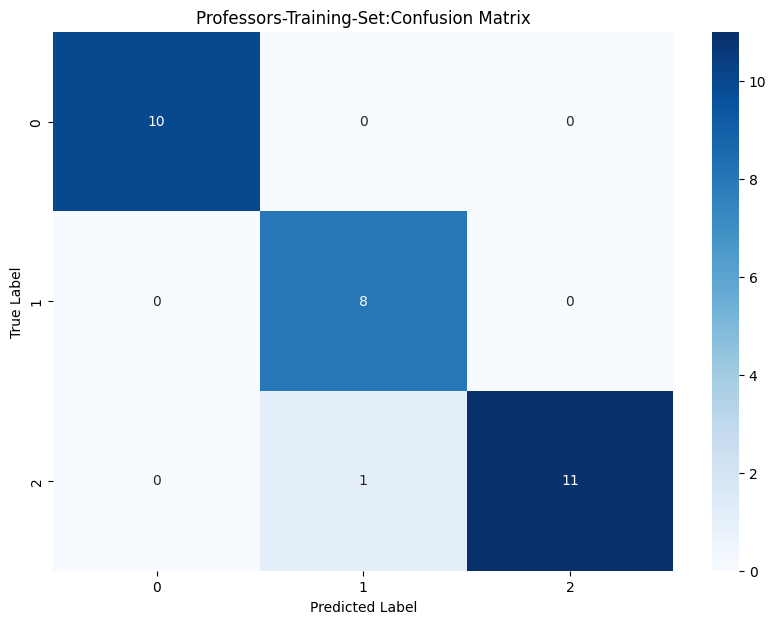

Accuracy: 0.9667


array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 11]])

In [12]:
## Nash Morrison
# Import necessary libraries and functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
# This line calculates the confusion matrix using the true labels (y_test) and
# the predicted labels (y_pred). The confusion matrix shows how many samples
# were correctly and incorrectly classified for each class.
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix, I was a little extra.
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Professors-Training-Set:Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy from the confusion matrix
# Sum of diagonal elements (correct predictions) divided by total sum
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Accuracy: {accuracy:.4f}")

# Generate the confusion matrix without visualization
# This is redundant as we've already calculated it above
confusion_matrix(y_test, y_pred)

# The following line is commented out but would use sklearn's accuracy_score
# function.
# accuracy_score(y_test, y_pred)


## We are looking at the main diagonal element across the matrix.
 #[TLeft->BRight]
# Those represent correct predictions for that class. The off diagonal elements represent
# misclassifications. If this number is high, our model is constantly confusing
# certain classes with each other.
# Seems to be classifying the data quite well.






In [17]:
# or do the calculation yourself without using the scikit learn functions
# accuracy is number of total predictions matching the actual test labels
# divided by the total number of test points or labels
# left as an exercise... TODO
sum(y_pred == y_test)/len(y_test)

0.9666666666666667

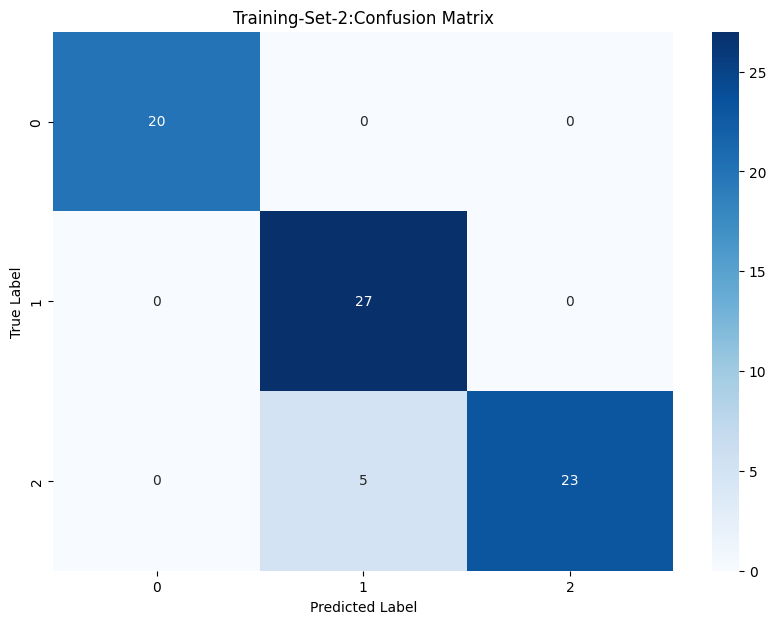

Accuracy: 0.9333



array([[20,  0,  0],
       [ 0, 27,  0],
       [ 0,  5, 23]])

In [16]:
# Nash Morrison
## Our gigantic variety of imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## This is our new training set, recalculated by difference in test_size &
#  our random state.
X_train2, X_test2, y_train2, y_test2 = train_test_split(data,
                                                        labels,
                                                        test_size = 0.5,
                                                        random_state=36)

## This is setting up our data to be analyzed into a confusion matrix.
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

# Calculate the confusion matrix
# This line calculates the confusion matrix using the true labels (y_test) and
# the predicted labels (y_pred). The confusion matrix shows how many samples
# were correctly and incorrectly classified for each class.
cm = confusion_matrix(y_test2, y_pred2)

# Nash Morrison
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Training-Set-2:Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculates and prints our accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Accuracy: {accuracy:.4f}\n")

# Showing a basic Confusion Matrix to double check
confusion_matrix(y_test2,y_pred2)

## What I notice is that by increasing our test size by [.2] and lowering our
## random state brings our accuracy down by about [.03]
## Decreasing our test_size back down to [.3] gives us a better accuracy
## then our professors code.
## Decreasing the random state to what our professor had it at give usa smidge
## lower of an accuracy, so I believe it has more to do with the test_size
## then the random_state

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

